In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import cvxpy as cp

In [2]:
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
X, y = lfw_people.data, lfw_people.target

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
n, d = X_train_scaled.shape
num_classes = len(np.unique(y))

In [6]:
w = [cp.Variable(d) for _ in range(num_classes)]
b = [cp.Variable() for _ in range(num_classes)]
C = 1.0

loss = 0
for i in range(num_classes):
    y_i = 2 * (y_train == i) - 1
    loss += cp.sum(cp.pos(1 - cp.multiply(y_i, X_train_scaled @ w[i] - b[i]))) + 0.5 * cp.norm(w[i], 2) ** 2
problem = cp.Problem(cp.Minimize(loss))

problem.solve()

3.1976835428898442

In [7]:
scores = np.array([X_test_scaled @ w[i].value - b[i].value for i in range(num_classes)])
y_pred = np.argmax(scores, axis=0)
y_pred

array([3, 3, 6, 3, 3, 3, 4, 1, 3, 3, 3, 3, 3, 6, 3, 3, 3, 1, 3, 4, 1, 6,
       3, 3, 0, 1, 1, 3, 3, 3, 2, 1, 3, 3, 3, 3, 3, 1, 6, 1, 3, 1, 3, 1,
       1, 1, 5, 3, 6, 3, 3, 3, 0, 3, 6, 2, 1, 3, 5, 3, 1, 1, 0, 4, 2, 4,
       6, 4, 1, 3, 6, 6, 3, 3, 3, 2, 1, 6, 6, 4, 6, 0, 3, 3, 3, 3, 5, 3,
       3, 3, 3, 6, 3, 1, 1, 6, 1, 1, 6, 6, 3, 1, 3, 1, 3, 1, 3, 3, 3, 1,
       4, 1, 4, 3, 3, 1, 3, 4, 1, 3, 1, 3, 3, 0, 3, 4, 4, 1, 1, 3, 6, 6,
       6, 3, 2, 4, 3, 3, 1, 1, 2, 3, 5, 1, 3, 4, 1, 3, 6, 1, 2, 1, 1, 3,
       3, 3, 6, 1, 1, 6, 6, 5, 5, 1, 3, 1, 5, 1, 2, 3, 1, 1, 6, 3, 5, 1,
       3, 2, 2, 4, 3, 3, 3, 1, 3, 3, 3, 3, 3, 2, 3, 2, 3, 3, 6, 3, 3, 6,
       3, 6, 3, 2, 1, 2, 3, 1, 6, 2, 2, 2, 6, 5, 3, 3, 3, 3, 3, 2, 0, 1,
       2, 3, 1, 1, 2, 3, 3, 3, 1, 3, 3, 3, 1, 0, 3, 1, 6, 3, 3, 3, 3, 4,
       6, 4, 3, 0, 3, 3, 3, 4, 4, 3, 2, 6, 3, 4, 3, 1])

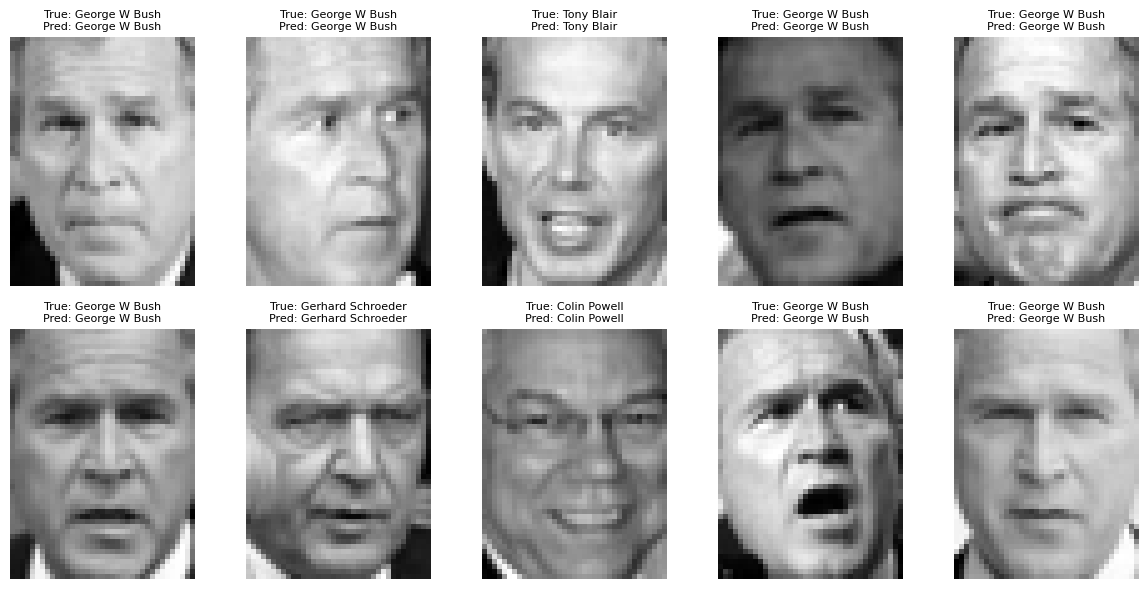

In [8]:
fig, axes = plt.subplots(2, 5, figsize=(12, 6))

for i, ax in enumerate(axes.flatten()):
    ax.imshow(X_test[i].reshape(50, 37), cmap='gray')
    ax.set_title(f"True: {lfw_people.target_names[y_test[i]]}\nPred: {lfw_people.target_names[y_pred[i]]}", fontsize=8)
    ax.axis('off')

plt.tight_layout()
plt.show()

In [9]:
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.82
